graph has 779 nodes with 1073 edges
137 connected components


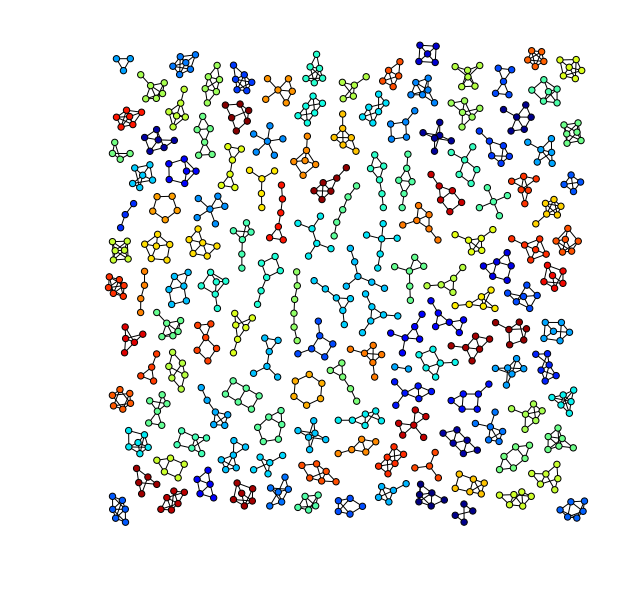

In [7]:
#!/usr/bin/env python
"""
Atlas of all graphs of 6 nodes or less.

"""
# Author: Aric Hagberg (hagberg@lanl.gov)

#    Copyright (C) 2004-2016 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

import networkx as nx
from networkx.generators.atlas import *
from networkx.algorithms.isomorphism.isomorph import graph_could_be_isomorphic as isomorphic
import random

def atlas6():
    """ Return the atlas of all connected graphs of 6 nodes or less.
        Attempt to check for isomorphisms and remove.
    """

    Atlas = graph_atlas_g()[0:208] # 208
    # remove isolated nodes, only connected graphs are left
    U = nx.Graph() # graph for union of all graphs in atlas
    for G in Atlas:
        zerodegree = [n for n in G if G.degree(n)==0]
        for n in zerodegree:
            G.remove_node(n)
        U = nx.disjoint_union(U, G)

    # list of graphs of all connected components
    C = nx.connected_component_subgraphs(U)

    UU = nx.Graph()
    # do quick isomorphic-like check, not a true isomorphism checker
    nlist = [] # list of nonisomorphic graphs
    for G in C:
        # check against all nonisomorphic graphs so far
        if not iso(G, nlist):
            nlist.append(G)
            UU = nx.disjoint_union(UU, G) # union the nonisomorphic graphs
    return UU

def iso(G1, glist):
    """Quick and dirty nonisomorphism checker used to check isomorphisms."""
    for G2 in glist:
        if isomorphic(G1, G2):
            return True
    return False


if __name__ == '__main__':
    G=atlas6()

    print("graph has %d nodes with %d edges"\
          %(nx.number_of_nodes(G), nx.number_of_edges(G)))
    print(nx.number_connected_components(G), "connected components")

    try:
        import pygraphviz
        from networkx.drawing.nx_agraph import graphviz_layout
    except ImportError:
        try:
            import pydotplus
            from networkx.drawing.nx_pydot import graphviz_layout
        except ImportError:
            raise ImportError("This example needs Graphviz and either "
                              "PyGraphviz or PyDotPlus")

    import matplotlib.pyplot as plt
    plt.figure(1, figsize=(8, 8))
    # layout graphs with positions using graphviz neato
    pos = graphviz_layout(G, prog="neato")
    # color nodes the same in each connected subgraph
    C = nx.connected_component_subgraphs(G)
    for g in C:
        c = [random.random()] * nx.number_of_nodes(g) # random color...
        nx.draw(g,
             pos,
             node_size=40,
             node_color=c,
             vmin=0.0,
             vmax=1.0,
             with_labels=False
             )
    plt.show()
    #plt.savefig("atlas.png", dpi=75)

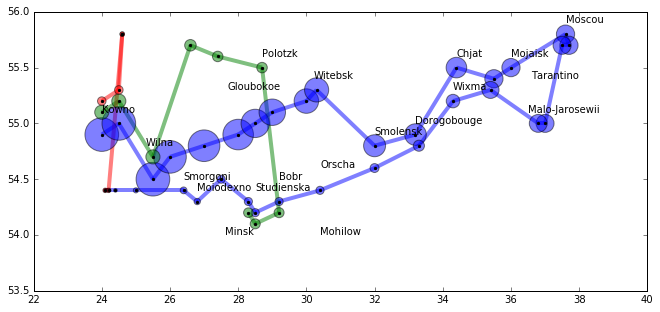

In [10]:
#!/usr/bin/env python
"""
Minard's data from Napoleon's 1812-1813  Russian Campaign.
http://www.math.yorku.ca/SCS/Gallery/minard/minard.txt

"""
# Author: Aric Hagberg (hagberg@lanl.gov)

#    Copyright (C) 2006-2016 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

import string
import networkx as nx


def minard_graph():
    data1="""\
24.0,54.9,340000,A,1
24.5,55.0,340000,A,1
25.5,54.5,340000,A,1
26.0,54.7,320000,A,1
27.0,54.8,300000,A,1
28.0,54.9,280000,A,1
28.5,55.0,240000,A,1
29.0,55.1,210000,A,1
30.0,55.2,180000,A,1
30.3,55.3,175000,A,1
32.0,54.8,145000,A,1
33.2,54.9,140000,A,1
34.4,55.5,127100,A,1
35.5,55.4,100000,A,1
36.0,55.5,100000,A,1
37.6,55.8,100000,A,1
37.7,55.7,100000,R,1
37.5,55.7,98000,R,1
37.0,55.0,97000,R,1
36.8,55.0,96000,R,1
35.4,55.3,87000,R,1
34.3,55.2,55000,R,1
33.3,54.8,37000,R,1
32.0,54.6,24000,R,1
30.4,54.4,20000,R,1
29.2,54.3,20000,R,1
28.5,54.2,20000,R,1
28.3,54.3,20000,R,1
27.5,54.5,20000,R,1
26.8,54.3,12000,R,1
26.4,54.4,14000,R,1
25.0,54.4,8000,R,1
24.4,54.4,4000,R,1
24.2,54.4,4000,R,1
24.1,54.4,4000,R,1"""
    data2="""\
24.0,55.1,60000,A,2
24.5,55.2,60000,A,2
25.5,54.7,60000,A,2
26.6,55.7,40000,A,2
27.4,55.6,33000,A,2
28.7,55.5,33000,R,2
29.2,54.2,30000,R,2
28.5,54.1,30000,R,2
28.3,54.2,28000,R,2"""
    data3="""\
24.0,55.2,22000,A,3
24.5,55.3,22000,A,3
24.6,55.8,6000,A,3
24.6,55.8,6000,R,3
24.2,54.4,6000,R,3
24.1,54.4,6000,R,3"""
    cities="""\
24.0,55.0,Kowno
25.3,54.7,Wilna
26.4,54.4,Smorgoni
26.8,54.3,Moiodexno
27.7,55.2,Gloubokoe
27.6,53.9,Minsk
28.5,54.3,Studienska
28.7,55.5,Polotzk
29.2,54.4,Bobr
30.2,55.3,Witebsk
30.4,54.5,Orscha
30.4,53.9,Mohilow
32.0,54.8,Smolensk
33.2,54.9,Dorogobouge
34.3,55.2,Wixma
34.4,55.5,Chjat
36.0,55.5,Mojaisk
37.6,55.8,Moscou
36.6,55.3,Tarantino
36.5,55.0,Malo-Jarosewii"""

    c={}
    for line in cities.split('\n'):
        x,y,name=line.split(',')
        c[name]=(float(x),float(y))

    g=[]

    for data in [data1,data2,data3]:
        G=nx.Graph()
        i=0
        G.pos={} # location
        G.pop={} # size
        last=None
        for line in data.split('\n'):
            x,y,p,r,n=line.split(',')
            G.pos[i]=(float(x),float(y))
            G.pop[i]=int(p)
            if last is None:
                last=i
            else:
                G.add_edge(i,last,{r:int(n)})
                last=i
            i=i+1
        g.append(G)

    return g,c

if __name__ == "__main__":

    (g,city)=minard_graph()

    try:
        import matplotlib.pyplot as plt
        plt.figure(1,figsize=(11,5))
        plt.clf()
        colors=['b','g','r']
        for G in g:
            c=colors.pop(0)
            node_size=[int(G.pop[n]/300.0) for n in G]
            nx.draw_networkx_edges(G,G.pos,edge_color=c,width=4,alpha=0.5)
            nx.draw_networkx_nodes(G,G.pos,node_size=node_size,node_color=c,alpha=0.5)
            nx.draw_networkx_nodes(G,G.pos,node_size=5,node_color='k')

        for c in city:
            x,y=city[c]
            plt.text(x,y+0.1,c)
        plt.show()
    except ImportError:
        pass